# Projet 3 : Identifier les facteurs qui influencent les performances commerciales (Python ou R)

##  Problématique métier
 Une entreprise souhaite comprendre les interactions entre ses
 produits, ses performances régionales et ses marges pour optimiser sa
 stratégie commerciale.

## Objectif
Analyser les relations quali-quali, quali-quanti et quanti-quanti pour détecter des facteurs clés.

## Chargement des bibliothèques

In [160]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

## Chargement des données 

In [54]:
df_sales = pd.read_csv(r"C:\Users\mabou\Documents\12_projet_analyse_de_donnees\projet_3\Sample_Superstore.csv",index_col = 'Row ID', encoding='cp1252')

In [56]:
df_sales.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## Nétoyage des données

Valeurs manquantes

In [77]:
df_sales.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [59]:
df_sales.isnull().sum()

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

Il n'y a pas de données manquantes dans notre jeux de données 

Lignes douplons

In [63]:
df_sales.duplicated().sum()

1

In [67]:
df_sales.loc[df_sales.duplicated()]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
3407,US-2014-150119,4/23/2014,4/27/2014,Standard Class,LB-16795,Laurel Beltran,Home Office,United States,Columbus,Ohio,43229,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372,2,0.3,-12.0588


In [69]:
# suppression des doublons
df_sales = df_sales.drop_duplicates()

information sur les données

In [72]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9993 entries, 1 to 9994
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9993 non-null   object 
 1   Order Date     9993 non-null   object 
 2   Ship Date      9993 non-null   object 
 3   Ship Mode      9993 non-null   object 
 4   Customer ID    9993 non-null   object 
 5   Customer Name  9993 non-null   object 
 6   Segment        9993 non-null   object 
 7   Country        9993 non-null   object 
 8   City           9993 non-null   object 
 9   State          9993 non-null   object 
 10  Postal Code    9993 non-null   int64  
 11  Region         9993 non-null   object 
 12  Product ID     9993 non-null   object 
 13  Category       9993 non-null   object 
 14  Sub-Category   9993 non-null   object 
 15  Product Name   9993 non-null   object 
 16  Sales          9993 non-null   float64
 17  Quantity       9993 non-null   int64  
 18  Discount     

## Analyse des ventes et profits par Région

In [79]:
df_region = df_sales[['Region', 'Sales', 'Profit']]

In [87]:
df_vente_par_region = df_region.groupby(['Region']).sum().reset_index()
df_vente_par_region

,Region,Sales,Profit
0,Central,501239.8908,39706.3625
1,East,678499.8680,91534.8388
2,South,391721.9050,46749.4303
3,West,725457.8245,108418.4489


In [89]:
x = df_vente_par_region ['Region']
y = df_vente_par_region ['Sales']

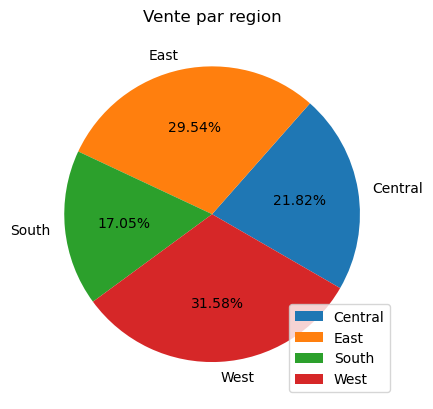

In [95]:
plt.pie(y,labels =x,autopct='%0.2f%%',startangle=-30)
plt.legend(loc=4)
plt.title('Vente par region')
plt.show()

Les régions de l'Est et de L'Ouest sont les régions où les produits sont le plus vendus.

In [99]:
x = df_vente_par_region ['Region']
y = df_vente_par_region ['Profit']

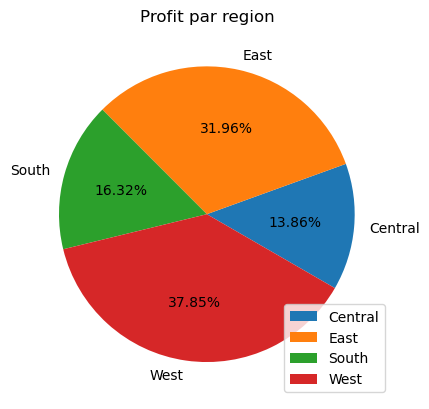

In [101]:
plt.pie(y,labels =x,autopct='%0.2f%%',startangle=-30)
plt.legend(loc=4)
plt.title('Profit par region')
plt.show()

comme attendus les profits sont plus réalisés dans les régions de l'Est et de l'Ouest 
le Sud et le Centre sont à la traîne par rapport au deux autres régions.

## Analyse des ventes et profits par Etats

In [105]:
df_etat = df_sales[['State', 'Sales', 'Profit']]

In [140]:
df_par_etat = df_etat.groupby(['State']).sum().reset_index()
df_par_etat.head(5)

,State,Sales,Profit
0,Alabama,19510.6400,5786.8253
1,Arizona,35282.0010,-3427.9246
2,Arkansas,11678.1300,4008.6871
3,California,457687.6315,76381.3871
4,Colorado,32108.1180,-6527.8579


In [142]:
top_vente_par_etat = df_par_etat.sort_values(by = ['Sales'], ascending = False)
top_vente_par_etat.head(5)

,State,Sales,Profit
3,California,457687.6315,76381.3871
30,New York,310876.2710,74038.5486
41,Texas,170188.0458,-25729.3563
45,Washington,138641.2700,33402.6517
36,Pennsylvania,116511.9140,-15559.9603


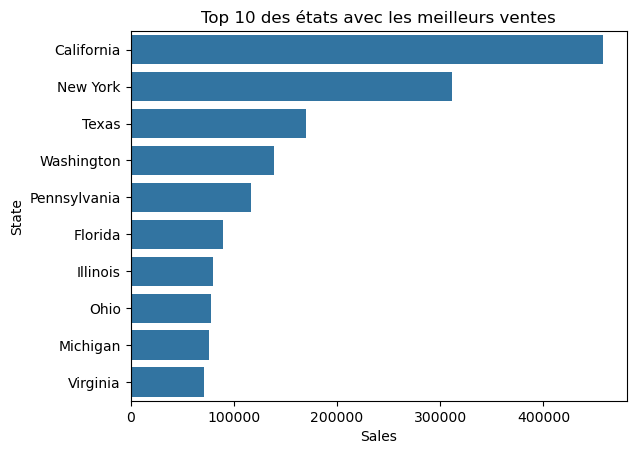

In [144]:
sns.barplot(x=top_vente_par_etat['Sales'].head(10), y=top_vente_par_etat['State'].head(10))
plt.title('Top 10 des états avec les meilleurs ventes')
plt.xlabel('Sales')
plt.ylabel('State')
plt.show()

Nous remarquons que les etats de Californie et de New York sont largement devant en ventes. 

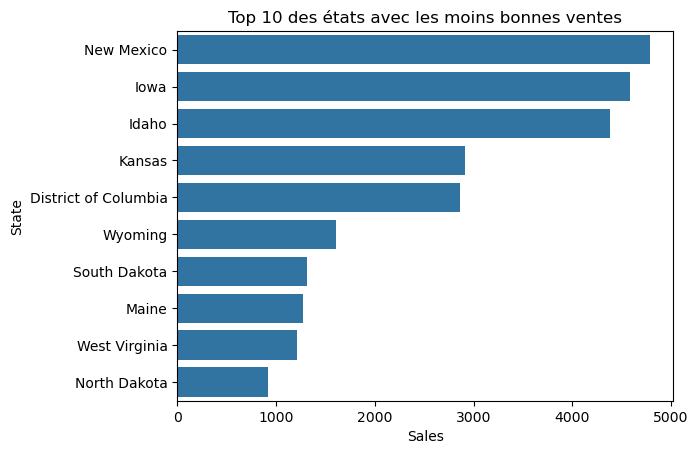

In [146]:
sns.barplot(x=top_vente_par_etat['Sales'].tail(10), y=top_vente_par_etat['State'].tail(10))
plt.title('Top 10 des états avec les moins bonnes ventes')
plt.xlabel('Sales')
plt.ylabel('State')
plt.show()

In [152]:
top_profit_par_etat = df_par_etat.sort_values(by = ['Profit'], ascending = False)
top_profit_par_etat.head(5)

,State,Sales,Profit
3,California,457687.6315,76381.3871
30,New York,310876.2710,74038.5486
45,Washington,138641.2700,33402.6517
20,Michigan,76269.6140,24463.1876
44,Virginia,70636.7200,18597.9504


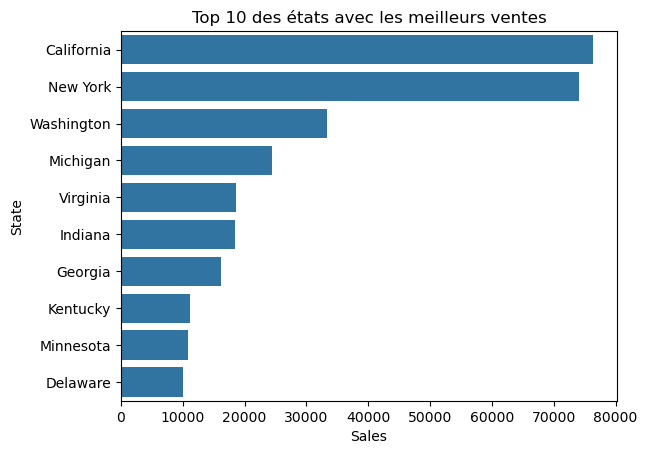

In [154]:
sns.barplot(x=top_profit_par_etat['Profit'].head(10), y=top_profit_par_etat['State'].head(10))
plt.title('Top 10 des états avec les meilleurs ventes')
plt.xlabel('Sales')
plt.ylabel('State')
plt.show()

Nous remarquons que les etats de Californie et de New York sont largement devant en Profit avec un écart de l'ordre de
40.000 $. 

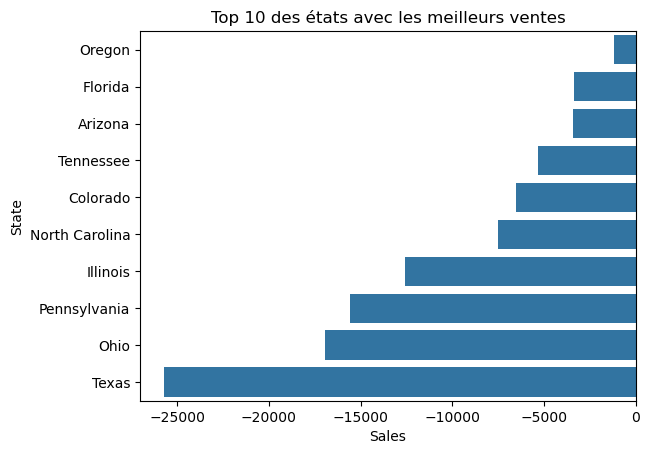

In [157]:
sns.barplot(x=top_profit_par_etat['Profit'].tail(10), y=top_profit_par_etat['State'].tail(10))
plt.title('Top 10 des états avec les meilleurs ventes')
plt.xlabel('Sales')
plt.ylabel('State')
plt.show()

## Analyse des ventes et profits par Sous-Catégories

In [167]:
df_sous_categorie = df_sales[['Sub-Category', 'Sales', 'Profit']]

In [171]:
df_sous_categorie = df_sous_categorie.groupby(['Sub-Category']).sum().reset_index()
df_sous_categorie

,Sub-Category,Sales,Profit
0,Accessories,167380.3180,41936.6357
1,Appliances,107532.1610,18138.0054
2,Art,27118.7920,6527.7870
3,Binders,203412.7330,30221.7633
4,Bookcases,114879.9963,-3472.5560
5,Chairs,328167.7310,26602.2251
6,Copiers,149528.0300,55617.8249
7,Envelopes,16476.4020,6964.1767
8,Fasteners,3024.2800,949.5182
9,Furnishings,91705.1640,13059.1436


In [173]:
top_profit_par_sous_categorie = df_sous_categorie.sort_values(by = ['Profit'], ascending = False)
top10_profit_par_sous_categorie = top_profit_par_sous_categorie.head(10)

In [175]:
top10_profit_par_sous_categorie

,Sub-Category,Sales,Profit
6,Copiers,149528.030,55617.8249
13,Phones,330007.054,44515.7306
0,Accessories,167380.318,41936.6357
12,Paper,78479.206,34053.5693
3,Binders,203412.733,30221.7633
5,Chairs,328167.731,26602.2251
14,Storage,223843.608,21278.8264
1,Appliances,107532.161,18138.0054
9,Furnishings,91705.164,13059.1436
7,Envelopes,16476.402,6964.1767


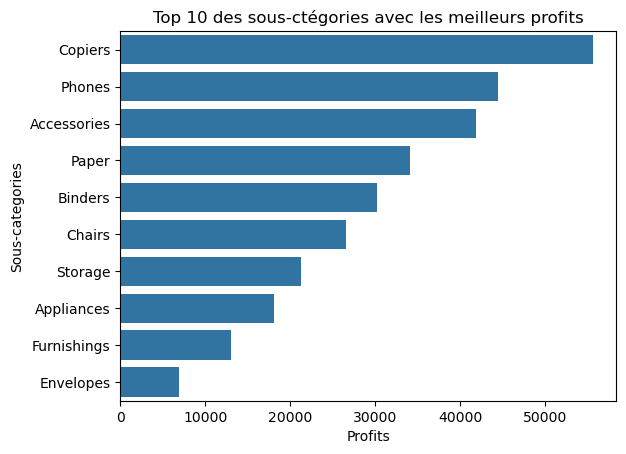

In [177]:
sns.barplot(x=top10_profit_par_sous_categorie['Profit'], y=top10_profit_par_sous_categorie['Sub-Category'])
plt.title('Top 10 des sous-ctégories avec les meilleurs profits')
plt.xlabel('Profits')
plt.ylabel('Sous-categories')
plt.show()

In [185]:
top_vente_par_sous_categorie = df_sous_categorie.sort_values(by = ['Sales'], ascending = False)
top10_vente_par_sous_categorie = top_vente_par_sous_categorie.head(10)

In [187]:
top10_vente_par_sous_categorie

,Sub-Category,Sales,Profit
13,Phones,330007.0540,44515.7306
5,Chairs,328167.7310,26602.2251
14,Storage,223843.6080,21278.8264
16,Tables,206965.5320,-17725.4811
3,Binders,203412.7330,30221.7633
11,Machines,189238.6310,3384.7569
0,Accessories,167380.3180,41936.6357
6,Copiers,149528.0300,55617.8249
4,Bookcases,114879.9963,-3472.5560
1,Appliances,107532.1610,18138.0054


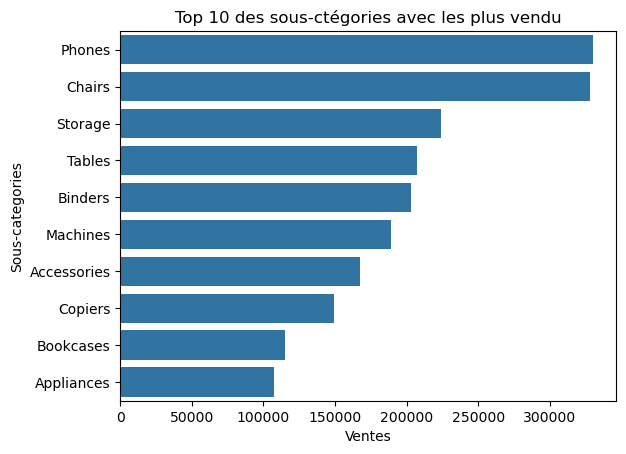

In [191]:
sns.barplot(x=top10_vente_par_sous_categorie['Sales'], y=top10_vente_par_sous_categorie['Sub-Category'])
plt.title('Top 10 des sous-ctégories avec les plus vendu')
plt.xlabel('Ventes')
plt.ylabel('Sous-categories')
plt.show()

## Nombre de clients dans chaque segment 

In [193]:
segments = df_sales.groupby(['Segment']).size().reset_index(name='Customers')
segments

,Segment,Customers
0,Consumer,5191
1,Corporate,3020
2,Home Office,1782


<Axes: xlabel='Segment', ylabel='Customers'>

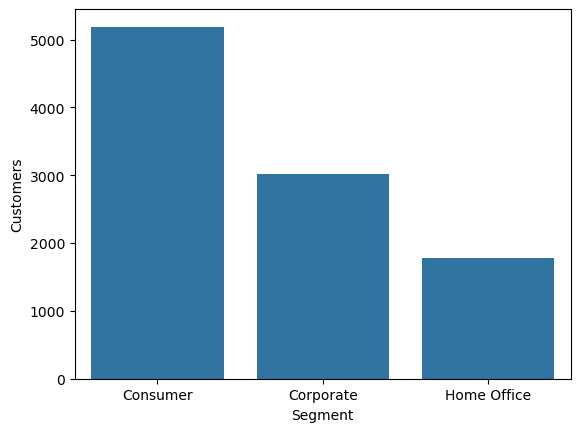

In [203]:
sns.barplot(x=segments['Segment'], y=segments['Customers'])